### Importing libraries

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
from torchsummary import summary
# from torchvision import datasets, transforms
import importlib
from utils import utils
from utils.dataset import Dataset
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Initialize
utils.set_seed(1)

### Import dataset: CIFAR10

In [3]:
dataset = Dataset('CIFAR10')

Files already downloaded and verified
Files already downloaded and verified
The mean and SD for CIFAR10 dataset are [0.49139968 0.48215841 0.44653091] and [0.24703223 0.24348513 0.26158784] respectively.
[0.49139968 0.48215841 0.44653091] [0.24703223 0.24348513 0.26158784]
Files already downloaded and verified
Files already downloaded and verified


In [4]:
train_loader, test_loader = dataset.get_data_loaders()

In [5]:
dataiter = iter(train_loader)
images, labels = next(dataiter)
images.shape, labels.shape

(torch.Size([128, 3, 32, 32]), torch.Size([128]))

### Visualize input images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

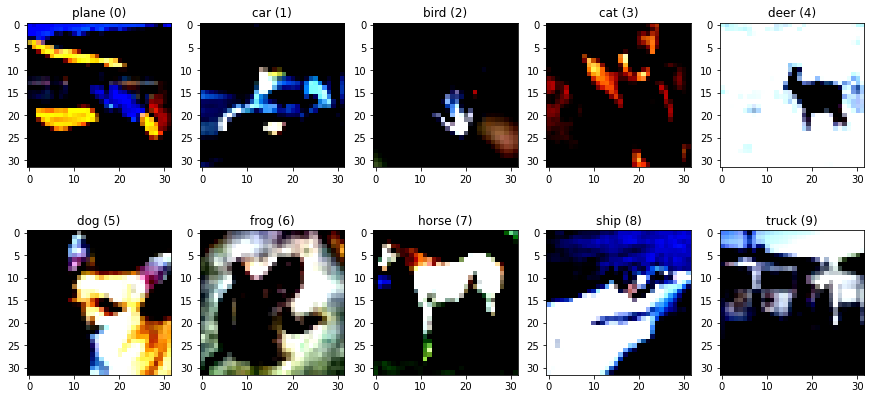

In [6]:
label_mapper = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
# images, labels = next(dataiter)
utils.visualize_images(images, labels, label_mapper, n_cols=5, figsize=(15, 7))

### Model Training

#### Model 1

In [7]:
from models import model_1
importlib.reload(model_1)

<module 'models.model_1' from 'd:\\Self Learning\\TSAI\\TSAI\\S8\\models\\model_1.py'>

In [8]:
from models.model_1 import Net_1
device = utils.get_device()
in_ch = 3
model_1 = Net_1(in_ch=in_ch).to(device)
summary(model_1, input_size=(in_ch, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             864
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
            Conv2d-4           [-1, 32, 32, 32]           9,216
       BatchNorm2d-5           [-1, 32, 32, 32]              64
              ReLU-6           [-1, 32, 32, 32]               0
            Conv2d-7           [-1, 16, 32, 32]             512
         MaxPool2d-8           [-1, 16, 16, 16]               0
            Conv2d-9           [-1, 64, 16, 16]           9,216
      BatchNorm2d-10           [-1, 64, 16, 16]             128
             ReLU-11           [-1, 64, 16, 16]               0
           Conv2d-12           [-1, 64, 16, 16]          36,864
      BatchNorm2d-13           [-1, 64, 16, 16]             128
             ReLU-14           [-1, 64,

In [9]:
num_epochs = 20
train_loader, test_loader = dataset.get_data_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_1.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_1.model_train(device, train_loader, criterion, optimizer)
    model_1.model_test(device, test_loader, criterion)

EPOCH: 1


Train: Loss=0.9732449650764465 Batch_id=390 Accuracy=48.15: 100%|██████████| 391/391 [00:25<00:00, 15.12it/s]


Test: Average loss: 1.3370, Accuracy: 5393/10000 (53.93%), Accuracy Diff: 5.778

EPOCH: 2


Train: Loss=0.8608630299568176 Batch_id=390 Accuracy=66.08: 100%|██████████| 391/391 [00:26<00:00, 14.62it/s]


Test: Average loss: 1.2654, Accuracy: 5462/10000 (54.62%), Accuracy Diff: 11.464

EPOCH: 3


Train: Loss=0.8478446006774902 Batch_id=390 Accuracy=72.41: 100%|██████████| 391/391 [00:25<00:00, 15.09it/s]


Test: Average loss: 0.8136, Accuracy: 7141/10000 (71.41%), Accuracy Diff: 1.0

EPOCH: 4


Train: Loss=0.5856850147247314 Batch_id=390 Accuracy=76.73: 100%|██████████| 391/391 [00:25<00:00, 15.39it/s]


Test: Average loss: 0.8013, Accuracy: 7208/10000 (72.08%), Accuracy Diff: 4.652

EPOCH: 5


Train: Loss=0.8196215629577637 Batch_id=390 Accuracy=79.58: 100%|██████████| 391/391 [00:26<00:00, 15.00it/s] 


Test: Average loss: 0.7831, Accuracy: 7346/10000 (73.46%), Accuracy Diff: 6.116

EPOCH: 6


Train: Loss=0.5995544195175171 Batch_id=390 Accuracy=82.11: 100%|██████████| 391/391 [00:27<00:00, 14.38it/s] 


Test: Average loss: 0.9858, Accuracy: 6933/10000 (69.33%), Accuracy Diff: 12.776

EPOCH: 7


Train: Loss=0.34105995297431946 Batch_id=390 Accuracy=83.85: 100%|██████████| 391/391 [00:26<00:00, 14.63it/s]


Test: Average loss: 0.6577, Accuracy: 7769/10000 (77.69%), Accuracy Diff: 6.162

EPOCH: 8


Train: Loss=0.3600388467311859 Batch_id=390 Accuracy=85.51: 100%|██████████| 391/391 [00:26<00:00, 15.02it/s] 


Test: Average loss: 0.6429, Accuracy: 7807/10000 (78.07%), Accuracy Diff: 7.436

EPOCH: 9


Train: Loss=0.32044968008995056 Batch_id=390 Accuracy=86.63: 100%|██████████| 391/391 [00:26<00:00, 15.01it/s]


Test: Average loss: 0.6509, Accuracy: 7836/10000 (78.36%), Accuracy Diff: 8.27

EPOCH: 10


Train: Loss=0.46616071462631226 Batch_id=390 Accuracy=87.86: 100%|██████████| 391/391 [00:26<00:00, 14.80it/s]


Test: Average loss: 0.6124, Accuracy: 7944/10000 (79.44%), Accuracy Diff: 8.424

EPOCH: 11


Train: Loss=0.32784730195999146 Batch_id=390 Accuracy=89.01: 100%|██████████| 391/391 [00:25<00:00, 15.21it/s]


Test: Average loss: 0.7404, Accuracy: 7792/10000 (77.92%), Accuracy Diff: 11.088

EPOCH: 12


Train: Loss=0.32642000913619995 Batch_id=390 Accuracy=89.94: 100%|██████████| 391/391 [00:25<00:00, 15.36it/s]


Test: Average loss: 0.6352, Accuracy: 7988/10000 (79.88%), Accuracy Diff: 10.064

EPOCH: 13


Train: Loss=0.3421887457370758 Batch_id=390 Accuracy=90.83: 100%|██████████| 391/391 [00:25<00:00, 15.25it/s] 


Test: Average loss: 0.7120, Accuracy: 7838/10000 (78.38%), Accuracy Diff: 12.45

EPOCH: 14


Train: Loss=0.31307369470596313 Batch_id=390 Accuracy=91.69: 100%|██████████| 391/391 [00:24<00:00, 15.81it/s]


Test: Average loss: 0.6319, Accuracy: 8093/10000 (80.93%), Accuracy Diff: 10.76

EPOCH: 15


Train: Loss=0.3245437741279602 Batch_id=390 Accuracy=92.53: 100%|██████████| 391/391 [00:25<00:00, 15.42it/s] 


Test: Average loss: 0.6547, Accuracy: 7977/10000 (79.77%), Accuracy Diff: 12.764

EPOCH: 16


Train: Loss=0.2537616193294525 Batch_id=390 Accuracy=93.26: 100%|██████████| 391/391 [00:27<00:00, 14.22it/s] 


Test: Average loss: 0.7458, Accuracy: 7870/10000 (78.70%), Accuracy Diff: 14.56

EPOCH: 17


Train: Loss=0.3245028257369995 Batch_id=390 Accuracy=93.63: 100%|██████████| 391/391 [00:25<00:00, 15.14it/s] 


Test: Average loss: 0.6614, Accuracy: 8082/10000 (80.82%), Accuracy Diff: 12.806

EPOCH: 18


Train: Loss=0.09540098905563354 Batch_id=390 Accuracy=94.60: 100%|██████████| 391/391 [00:25<00:00, 15.07it/s]


Test: Average loss: 0.7671, Accuracy: 7860/10000 (78.60%), Accuracy Diff: 16.002

EPOCH: 19


  0%|          | 0/391 [00:05<?, ?it/s]


KeyboardInterrupt: 

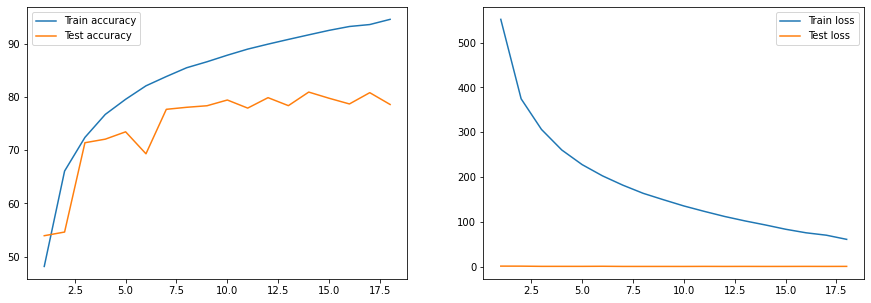

In [10]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_1.plot_accuracy()
plt.subplot(122)
model_1.plot_loss()
# plt.savefig('images/model_1.png')
plt.show()

In [16]:
max(model_1.train_accuracy), max(model_1.test_accuracy)

(94.602, 80.93)

#### Model 2

In [19]:
from models import model_2
importlib.reload(model_2)

<module 'models.model_2' from 'd:\\Self Learning\\TSAI\\TSAI\\S8\\models\\model_2.py'>

In [20]:
from models.model_2 import Net_2
device = utils.get_device()
in_ch = 3
model_2 = Net_2(in_ch=in_ch).to(device)
summary(model_2, input_size=(in_ch, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
            Conv2d-4           [-1, 16, 32, 32]           2,304
       BatchNorm2d-5           [-1, 16, 32, 32]              32
              ReLU-6           [-1, 16, 32, 32]               0
            Conv2d-7           [-1, 10, 32, 32]             160
         MaxPool2d-8           [-1, 10, 16, 16]               0
            Conv2d-9           [-1, 32, 16, 16]           2,880
      BatchNorm2d-10           [-1, 32, 16, 16]              64
             ReLU-11           [-1, 32, 16, 16]               0
           Conv2d-12           [-1, 32, 16, 16]           9,216
      BatchNorm2d-13           [-1, 32, 16, 16]              64
             ReLU-14           [-1, 32,

In [23]:
num_epochs = 20
train_loader, test_loader = dataset.get_data_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_2.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_2.model_train(device, train_loader, criterion, optimizer)
    model_2.model_test(device, test_loader, criterion)

EPOCH: 1


Train: Loss=1.381955862045288 Batch_id=390 Accuracy=42.54: 100%|██████████| 391/391 [00:40<00:00,  9.55it/s] 


Test: Average loss: 1.4268, Accuracy: 4770/10000 (47.70%), Accuracy Diff: 5.162

EPOCH: 2


Train: Loss=1.1182525157928467 Batch_id=390 Accuracy=58.90: 100%|██████████| 391/391 [00:46<00:00,  8.47it/s]


Test: Average loss: 1.2604, Accuracy: 5502/10000 (55.02%), Accuracy Diff: 3.882

EPOCH: 3


Train: Loss=1.0130925178527832 Batch_id=390 Accuracy=64.77: 100%|██████████| 391/391 [00:42<00:00,  9.30it/s]


Test: Average loss: 1.0422, Accuracy: 6286/10000 (62.86%), Accuracy Diff: 1.906

EPOCH: 4


Train: Loss=0.9898665547370911 Batch_id=390 Accuracy=68.84: 100%|██████████| 391/391 [00:36<00:00, 10.63it/s]


Test: Average loss: 0.9737, Accuracy: 6545/10000 (65.45%), Accuracy Diff: 3.39

EPOCH: 5


Train: Loss=0.7104946970939636 Batch_id=390 Accuracy=71.71: 100%|██████████| 391/391 [00:36<00:00, 10.68it/s]


Test: Average loss: 0.9580, Accuracy: 6689/10000 (66.89%), Accuracy Diff: 4.816

EPOCH: 6


Train: Loss=0.6054537892341614 Batch_id=390 Accuracy=74.15: 100%|██████████| 391/391 [00:36<00:00, 10.77it/s]


Test: Average loss: 0.8345, Accuracy: 7051/10000 (70.51%), Accuracy Diff: 3.636

EPOCH: 7


Train: Loss=0.7208147048950195 Batch_id=390 Accuracy=76.07: 100%|██████████| 391/391 [00:38<00:00, 10.10it/s] 


Test: Average loss: 0.7957, Accuracy: 7225/10000 (72.25%), Accuracy Diff: 3.82

EPOCH: 8


Train: Loss=0.647965133190155 Batch_id=390 Accuracy=77.61: 100%|██████████| 391/391 [00:41<00:00,  9.42it/s]  


Test: Average loss: 0.9948, Accuracy: 6714/10000 (67.14%), Accuracy Diff: 10.466

EPOCH: 9


Train: Loss=0.9806948900222778 Batch_id=390 Accuracy=78.69: 100%|██████████| 391/391 [00:35<00:00, 10.93it/s] 


Test: Average loss: 0.7696, Accuracy: 7384/10000 (73.84%), Accuracy Diff: 4.846

EPOCH: 10


Train: Loss=0.6535689830780029 Batch_id=390 Accuracy=79.85: 100%|██████████| 391/391 [00:37<00:00, 10.34it/s] 


Test: Average loss: 0.8078, Accuracy: 7316/10000 (73.16%), Accuracy Diff: 6.694

EPOCH: 11


Train: Loss=0.6401223540306091 Batch_id=390 Accuracy=80.58: 100%|██████████| 391/391 [00:35<00:00, 10.89it/s] 


Test: Average loss: 0.7443, Accuracy: 7480/10000 (74.80%), Accuracy Diff: 5.78

EPOCH: 12


Train: Loss=0.5006119012832642 Batch_id=390 Accuracy=81.55: 100%|██████████| 391/391 [00:37<00:00, 10.31it/s] 


Test: Average loss: 0.7388, Accuracy: 7509/10000 (75.09%), Accuracy Diff: 6.46

EPOCH: 13


Train: Loss=0.6503353714942932 Batch_id=390 Accuracy=82.13: 100%|██████████| 391/391 [00:37<00:00, 10.53it/s] 


Test: Average loss: 0.7578, Accuracy: 7471/10000 (74.71%), Accuracy Diff: 7.42

EPOCH: 14


Train: Loss=0.47413021326065063 Batch_id=390 Accuracy=82.87: 100%|██████████| 391/391 [00:35<00:00, 10.93it/s]


Test: Average loss: 0.7489, Accuracy: 7505/10000 (75.05%), Accuracy Diff: 7.822

EPOCH: 15


Train: Loss=0.624754011631012 Batch_id=390 Accuracy=83.54: 100%|██████████| 391/391 [00:40<00:00,  9.61it/s]  


Test: Average loss: 0.8427, Accuracy: 7320/10000 (73.20%), Accuracy Diff: 10.344

EPOCH: 16


Train: Loss=0.3560946583747864 Batch_id=390 Accuracy=84.23: 100%|██████████| 391/391 [00:38<00:00, 10.17it/s] 


Test: Average loss: 0.6992, Accuracy: 7688/10000 (76.88%), Accuracy Diff: 7.352

EPOCH: 17


Train: Loss=0.2060338705778122 Batch_id=390 Accuracy=84.29: 100%|██████████| 391/391 [00:37<00:00, 10.32it/s] 


Test: Average loss: 0.7048, Accuracy: 7667/10000 (76.67%), Accuracy Diff: 7.622

EPOCH: 18


Train: Loss=0.41665610671043396 Batch_id=390 Accuracy=85.09: 100%|██████████| 391/391 [00:36<00:00, 10.75it/s]


Test: Average loss: 0.7348, Accuracy: 7627/10000 (76.27%), Accuracy Diff: 8.824

EPOCH: 19


Train: Loss=0.4739920198917389 Batch_id=390 Accuracy=85.63: 100%|██████████| 391/391 [00:39<00:00, 10.01it/s] 


Test: Average loss: 0.7562, Accuracy: 7575/10000 (75.75%), Accuracy Diff: 9.88

EPOCH: 20


Train: Loss=0.4560871720314026 Batch_id=390 Accuracy=85.78: 100%|██████████| 391/391 [00:36<00:00, 10.73it/s] 


Test: Average loss: 0.7607, Accuracy: 7576/10000 (75.76%), Accuracy Diff: 10.02



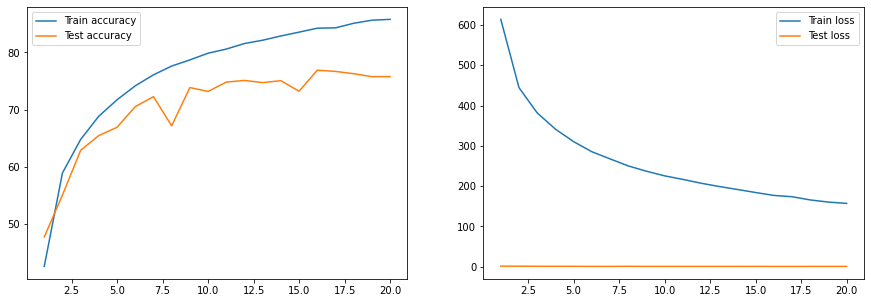

In [25]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_2.plot_accuracy()
plt.subplot(122)
model_2.plot_loss()
# plt.savefig('images/model_1.png')
plt.show()

In [26]:
max(model_2.train_accuracy), max(model_2.test_accuracy)

(85.78, 76.88)

#### Model 3

In [9]:
from models import model_3
importlib.reload(model_3)

<module 'models.model_3' from 'd:\\Self Learning\\TSAI\\TSAI\\S8\\models\\model_3.py'>

In [10]:
from models.model_3 import Net_3
device = utils.get_device()
in_ch = 3
model_3 = Net_3(in_ch=in_ch).to(device)
summary(model_3, input_size=(in_ch, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 32, 32]             432
       BatchNorm2d-2           [-1, 16, 32, 32]              32
              ReLU-3           [-1, 16, 32, 32]               0
           Dropout-4           [-1, 16, 32, 32]               0
            Conv2d-5           [-1, 16, 32, 32]           2,304
       BatchNorm2d-6           [-1, 16, 32, 32]              32
              ReLU-7           [-1, 16, 32, 32]               0
           Dropout-8           [-1, 16, 32, 32]               0
            Conv2d-9           [-1, 10, 32, 32]             160
        MaxPool2d-10           [-1, 10, 16, 16]               0
           Conv2d-11           [-1, 32, 16, 16]           2,880
      BatchNorm2d-12           [-1, 32, 16, 16]              64
             ReLU-13           [-1, 32, 16, 16]               0
          Dropout-14           [-1, 32,

In [7]:
num_epochs = 20
train_loader, test_loader = dataset.get_data_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_3.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_3.model_train(device, train_loader, criterion, optimizer)
    model_3.model_test(device, test_loader, criterion)

EPOCH: 1


Train: Loss=1.406333088874817 Batch_id=390 Accuracy=37.18: 100%|██████████| 391/391 [00:34<00:00, 11.39it/s] 


Test: Average loss: 1.5846, Accuracy: 4294/10000 (42.94%), Accuracy Diff: 5.756

EPOCH: 2


Train: Loss=1.1943985223770142 Batch_id=390 Accuracy=54.28: 100%|██████████| 391/391 [00:32<00:00, 12.22it/s]


Test: Average loss: 1.3552, Accuracy: 5035/10000 (50.35%), Accuracy Diff: 3.934

EPOCH: 3


Train: Loss=1.1716173887252808 Batch_id=390 Accuracy=61.17: 100%|██████████| 391/391 [00:37<00:00, 10.36it/s]


Test: Average loss: 1.2361, Accuracy: 5673/10000 (56.73%), Accuracy Diff: 4.44

EPOCH: 4


Train: Loss=0.7924467921257019 Batch_id=390 Accuracy=64.56: 100%|██████████| 391/391 [00:40<00:00,  9.73it/s]


Test: Average loss: 1.2197, Accuracy: 5575/10000 (55.75%), Accuracy Diff: 8.808

EPOCH: 5


Train: Loss=0.9737498164176941 Batch_id=390 Accuracy=66.54: 100%|██████████| 391/391 [00:35<00:00, 11.07it/s]


Test: Average loss: 1.0751, Accuracy: 6181/10000 (61.81%), Accuracy Diff: 4.732

EPOCH: 6


Train: Loss=0.9637675285339355 Batch_id=390 Accuracy=68.64: 100%|██████████| 391/391 [00:35<00:00, 11.11it/s]


Test: Average loss: 0.9885, Accuracy: 6489/10000 (64.89%), Accuracy Diff: 3.748

EPOCH: 7


Train: Loss=0.8150189518928528 Batch_id=390 Accuracy=70.02: 100%|██████████| 391/391 [00:36<00:00, 10.70it/s]


Test: Average loss: 0.9068, Accuracy: 6741/10000 (67.41%), Accuracy Diff: 2.608

EPOCH: 8


Train: Loss=0.9283958673477173 Batch_id=390 Accuracy=71.50: 100%|██████████| 391/391 [00:42<00:00,  9.27it/s]


Test: Average loss: 0.8597, Accuracy: 6954/10000 (69.54%), Accuracy Diff: 1.96

EPOCH: 9


Train: Loss=0.8405256271362305 Batch_id=390 Accuracy=72.47: 100%|██████████| 391/391 [00:36<00:00, 10.69it/s] 


Test: Average loss: 1.0630, Accuracy: 6326/10000 (63.26%), Accuracy Diff: 9.21

EPOCH: 10


Train: Loss=0.8710673451423645 Batch_id=390 Accuracy=73.58: 100%|██████████| 391/391 [00:36<00:00, 10.66it/s]


Test: Average loss: 0.8153, Accuracy: 7157/10000 (71.57%), Accuracy Diff: 2.01

EPOCH: 11


Train: Loss=0.6017589569091797 Batch_id=390 Accuracy=74.16: 100%|██████████| 391/391 [00:47<00:00,  8.24it/s]


Test: Average loss: 0.8736, Accuracy: 6911/10000 (69.11%), Accuracy Diff: 5.048

EPOCH: 12


Train: Loss=0.6255892515182495 Batch_id=390 Accuracy=74.86: 100%|██████████| 391/391 [00:44<00:00,  8.88it/s]


Test: Average loss: 0.8303, Accuracy: 7067/10000 (70.67%), Accuracy Diff: 4.186

EPOCH: 13


Train: Loss=0.6410551071166992 Batch_id=390 Accuracy=75.72: 100%|██████████| 391/391 [00:42<00:00,  9.23it/s] 


Test: Average loss: 0.7734, Accuracy: 7267/10000 (72.67%), Accuracy Diff: 3.054

EPOCH: 14


Train: Loss=0.5997151136398315 Batch_id=390 Accuracy=76.39: 100%|██████████| 391/391 [00:40<00:00,  9.64it/s] 


Test: Average loss: 0.7022, Accuracy: 7526/10000 (75.26%), Accuracy Diff: 1.13

EPOCH: 15


Train: Loss=0.6050882935523987 Batch_id=390 Accuracy=76.59: 100%|██████████| 391/391 [00:43<00:00,  8.98it/s] 


Test: Average loss: 0.6966, Accuracy: 7600/10000 (76.00%), Accuracy Diff: 0.588

EPOCH: 16


Train: Loss=0.5395708084106445 Batch_id=390 Accuracy=77.20: 100%|██████████| 391/391 [00:37<00:00, 10.42it/s] 


Test: Average loss: 0.8565, Accuracy: 7001/10000 (70.01%), Accuracy Diff: 7.19

EPOCH: 17


Train: Loss=0.7352797389030457 Batch_id=390 Accuracy=77.75: 100%|██████████| 391/391 [00:41<00:00,  9.39it/s] 


Test: Average loss: 0.7195, Accuracy: 7504/10000 (75.04%), Accuracy Diff: 2.712

EPOCH: 18


Train: Loss=0.5087803602218628 Batch_id=390 Accuracy=78.21: 100%|██████████| 391/391 [00:37<00:00, 10.39it/s] 


Test: Average loss: 0.6953, Accuracy: 7576/10000 (75.76%), Accuracy Diff: 2.45

EPOCH: 19


Train: Loss=0.6949062943458557 Batch_id=390 Accuracy=78.26: 100%|██████████| 391/391 [00:39<00:00, 10.01it/s] 


Test: Average loss: 0.7169, Accuracy: 7477/10000 (74.77%), Accuracy Diff: 3.486

EPOCH: 20


Train: Loss=0.5645448565483093 Batch_id=390 Accuracy=78.78: 100%|██████████| 391/391 [00:47<00:00,  8.29it/s] 


Test: Average loss: 0.6559, Accuracy: 7718/10000 (77.18%), Accuracy Diff: 1.596



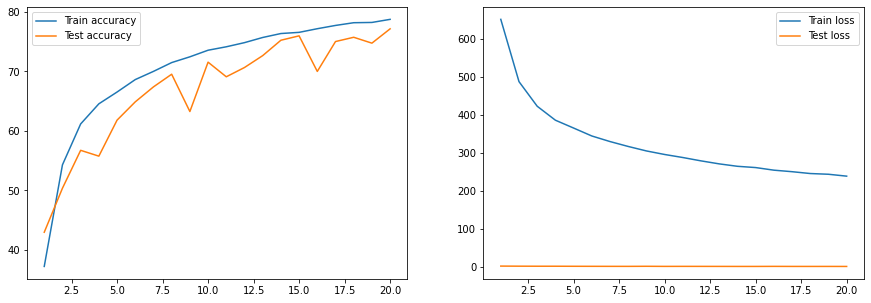

In [8]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_3.plot_accuracy()
plt.subplot(122)
model_3.plot_loss()
# plt.savefig('images/model_1.png')
plt.show()

In [9]:
max(model_3.train_accuracy), max(model_3.test_accuracy)

(78.776, 77.18)

#### Model 4

In [17]:
from models import model_4
importlib.reload(model_4)

<module 'models.model_4' from 'd:\\Self Learning\\TSAI\\TSAI\\S8\\models\\model_4.py'>

In [18]:
from models.model_4 import Net_4
device = utils.get_device()
in_ch = 3
model_4 = Net_4(in_ch=in_ch).to(device)
summary(model_4, input_size=(in_ch, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 32, 32]             216
       BatchNorm2d-2            [-1, 8, 32, 32]              16
              ReLU-3            [-1, 8, 32, 32]               0
           Dropout-4            [-1, 8, 32, 32]               0
            Conv2d-5            [-1, 8, 32, 32]             576
       BatchNorm2d-6            [-1, 8, 32, 32]              16
              ReLU-7            [-1, 8, 32, 32]               0
           Dropout-8            [-1, 8, 32, 32]               0
            Conv2d-9            [-1, 8, 32, 32]              64
        MaxPool2d-10            [-1, 8, 16, 16]               0
           Conv2d-11           [-1, 16, 16, 16]           1,152
      BatchNorm2d-12           [-1, 16, 16, 16]              32
             ReLU-13           [-1, 16, 16, 16]               0
          Dropout-14           [-1, 16,

In [19]:
num_epochs = 20
train_loader, test_loader = dataset.get_data_loaders()
criterion = F.nll_loss
optimizer = optim.SGD(model_4.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, num_epochs+1):
    print('EPOCH:', epoch)
    model_4.model_train(device, train_loader, criterion, optimizer)
    model_4.model_test(device, test_loader, criterion)

EPOCH: 1


Train: Loss=1.4563419818878174 Batch_id=390 Accuracy=37.29: 100%|██████████| 391/391 [00:20<00:00, 19.46it/s]


Test: Average loss: 1.6807, Accuracy: 3697/10000 (36.97%), Accuracy Diff: 0.316

EPOCH: 2


Train: Loss=1.144977331161499 Batch_id=390 Accuracy=52.56: 100%|██████████| 391/391 [00:19<00:00, 20.11it/s] 


Test: Average loss: 1.4137, Accuracy: 4954/10000 (49.54%), Accuracy Diff: 3.022

EPOCH: 3


Train: Loss=1.3427249193191528 Batch_id=390 Accuracy=59.49: 100%|██████████| 391/391 [00:19<00:00, 20.35it/s]


Test: Average loss: 1.2523, Accuracy: 5499/10000 (54.99%), Accuracy Diff: 4.504

EPOCH: 4


Train: Loss=0.8527549505233765 Batch_id=390 Accuracy=62.51: 100%|██████████| 391/391 [00:20<00:00, 19.18it/s]


Test: Average loss: 1.1352, Accuracy: 5990/10000 (59.90%), Accuracy Diff: 2.608

EPOCH: 5


Train: Loss=1.0885169506072998 Batch_id=390 Accuracy=65.16: 100%|██████████| 391/391 [00:16<00:00, 23.27it/s]


Test: Average loss: 0.9614, Accuracy: 6587/10000 (65.87%), Accuracy Diff: 0.708

EPOCH: 6


Train: Loss=0.9198894500732422 Batch_id=390 Accuracy=66.96: 100%|██████████| 391/391 [00:16<00:00, 23.48it/s]


Test: Average loss: 0.9756, Accuracy: 6464/10000 (64.64%), Accuracy Diff: 2.32

EPOCH: 7


Train: Loss=0.9463642835617065 Batch_id=390 Accuracy=68.55: 100%|██████████| 391/391 [00:16<00:00, 23.05it/s]


Test: Average loss: 0.9985, Accuracy: 6354/10000 (63.54%), Accuracy Diff: 5.008

EPOCH: 8


Train: Loss=0.9152129292488098 Batch_id=390 Accuracy=69.65: 100%|██████████| 391/391 [00:16<00:00, 23.38it/s]


Test: Average loss: 0.8873, Accuracy: 6858/10000 (68.58%), Accuracy Diff: 1.074

EPOCH: 9


Train: Loss=0.7113717198371887 Batch_id=390 Accuracy=70.66: 100%|██████████| 391/391 [00:18<00:00, 21.18it/s]


Test: Average loss: 0.8302, Accuracy: 7088/10000 (70.88%), Accuracy Diff: 0.218

EPOCH: 10


Train: Loss=0.7035343050956726 Batch_id=390 Accuracy=71.26: 100%|██████████| 391/391 [00:19<00:00, 20.30it/s]


Test: Average loss: 0.8934, Accuracy: 6849/10000 (68.49%), Accuracy Diff: 2.768

EPOCH: 11


Train: Loss=0.584553599357605 Batch_id=390 Accuracy=72.08: 100%|██████████| 391/391 [00:19<00:00, 20.26it/s] 


Test: Average loss: 0.9509, Accuracy: 6735/10000 (67.35%), Accuracy Diff: 4.728

EPOCH: 12


Train: Loss=0.7028083801269531 Batch_id=390 Accuracy=72.64: 100%|██████████| 391/391 [00:19<00:00, 20.39it/s]


Test: Average loss: 0.7473, Accuracy: 7397/10000 (73.97%), Accuracy Diff: 1.332

EPOCH: 13


Train: Loss=0.8393305540084839 Batch_id=390 Accuracy=73.00: 100%|██████████| 391/391 [00:18<00:00, 20.58it/s]


Test: Average loss: 0.8047, Accuracy: 7212/10000 (72.12%), Accuracy Diff: 0.884

EPOCH: 14


Train: Loss=0.7938432693481445 Batch_id=390 Accuracy=73.60: 100%|██████████| 391/391 [00:18<00:00, 20.64it/s]


Test: Average loss: 0.7967, Accuracy: 7207/10000 (72.07%), Accuracy Diff: 1.534

EPOCH: 15


Train: Loss=0.6706952452659607 Batch_id=390 Accuracy=73.77: 100%|██████████| 391/391 [00:19<00:00, 19.60it/s]


Test: Average loss: 0.7708, Accuracy: 7269/10000 (72.69%), Accuracy Diff: 1.076

EPOCH: 16


Train: Loss=0.6308037042617798 Batch_id=390 Accuracy=74.32: 100%|██████████| 391/391 [00:19<00:00, 20.38it/s]


Test: Average loss: 0.7743, Accuracy: 7287/10000 (72.87%), Accuracy Diff: 1.452

EPOCH: 17


Train: Loss=0.5598481893539429 Batch_id=390 Accuracy=74.63: 100%|██████████| 391/391 [00:19<00:00, 19.75it/s] 


Test: Average loss: 0.7937, Accuracy: 7192/10000 (71.92%), Accuracy Diff: 2.712

EPOCH: 18


Train: Loss=0.7382367253303528 Batch_id=390 Accuracy=75.41: 100%|██████████| 391/391 [00:19<00:00, 19.94it/s]


Test: Average loss: 0.7929, Accuracy: 7214/10000 (72.14%), Accuracy Diff: 3.27

EPOCH: 19


Train: Loss=0.7394164800643921 Batch_id=390 Accuracy=75.01: 100%|██████████| 391/391 [00:19<00:00, 20.23it/s]


Test: Average loss: 0.7090, Accuracy: 7543/10000 (75.43%), Accuracy Diff: 0.416

EPOCH: 20


Train: Loss=0.6275702714920044 Batch_id=390 Accuracy=75.38: 100%|██████████| 391/391 [00:36<00:00, 10.62it/s]


Test: Average loss: 0.7963, Accuracy: 7205/10000 (72.05%), Accuracy Diff: 3.326



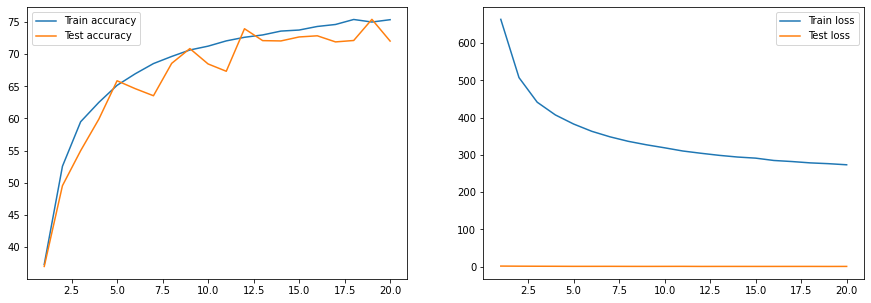

In [20]:
plt.figure(figsize=(15, 5))
plt.subplot(121)
model_4.plot_accuracy()
plt.subplot(122)
model_4.plot_loss()
# plt.savefig('images/model_1.png')
plt.show()

In [21]:
max(model_4.train_accuracy), max(model_4.test_accuracy)

(75.41, 75.43)